In [1]:
%pip install matplotlib

You should consider upgrading via the '/Users/MasaAir3/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [35]:
#%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
#%pip install pandas

You should consider upgrading via the '/Users/MasaAir3/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [36]:
import numpy as np
import pandas as pd

In [37]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [39]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [41]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
m = Base.classes.measurement 
s = Base.classes.station

In [43]:
# Create a session
session = Session(engine)

In [44]:
#Finding columns in Measurement 
inspector = inspect(engine)
columns = inspector.get_table_names()
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [45]:
#Finding columns in Station
columns = inspector.get_table_names()
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
lastdate = session.query(m.date).order_by(m.date.desc()).first()
print(lastdate[0])

lastdate_dtobj = dt.datetime.strptime("2017-08-23","%Y-%m-%d")

yearAgo = lastdate_dtobj - timedelta(days=365)

2017-08-23


In [47]:
# Perform a query to retrieve the data and precipitation scores
precip_analysis = session.query(m.date, m.prcp).filter(m.date >= '2016-08-23').filter(m.date <= '2017-08-23').all()

In [48]:
len(precip_analysis)

2230

In [49]:
# Save the query results as a Pandas DataFrame
precip_df = pd.DataFrame(precip_analysis,columns=['date','precipitation'])
precip_df.head()


,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [50]:
# Set the index to the date column and sort the dataframe by date
precip_df.set_index('date', inplace=True)
precip_df = precip_df.sort_index()

In [51]:
precip_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


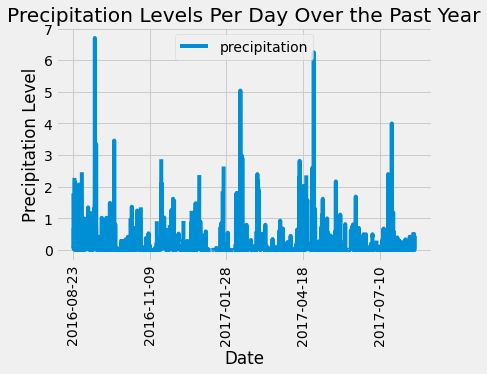

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot(rot=90,
                    grid=True,
                    title="Precipitation Levels Per Day Over the Past Year")
ax.set_xlabel("Date")
ax.set_ylabel("Inches")

ax.set_ylabel("Precipitation Level");

In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [54]:
# Design a query to show how many stations are available in this dataset?
numStations = session.query(s.station).count()
print(f"There are {numStations} stations.")

There are 9 stations.


In [55]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
mostActive = session.query(m.station,func.count(m.station)).\
             group_by(m.station).\
             order_by(func.count(m.station).desc()).all()

mostActive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(m.tobs),func.max(m.tobs),func.avg(m.tobs)).\
             filter(m.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [57]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281 = session.query(m.tobs,m.date).\
             filter(m.station == 'USC00519281').\
             filter(m.date >= '2016-08-23').filter(m.date <= '2017-08-23').all()
USC00519281[:5]

[(77.0, '2016-08-23'),
 (77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27')]

In [58]:
USC00519281_df = pd.DataFrame(USC00519281)
USC00519281_df.rename({"tobs": "Temperature"}, axis='columns')

,Temperature,date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27
...,...,...
347,77.0,2017-08-14
348,77.0,2017-08-15
349,76.0,2017-08-16
350,76.0,2017-08-17


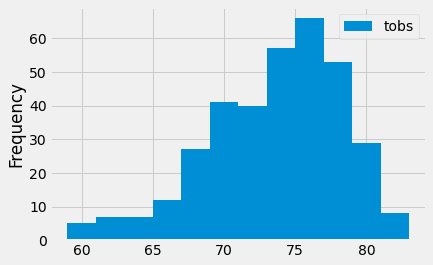

In [59]:
hist = USC00519281_df.plot(kind="hist",bins=12)

## Bonus Challenge Assignment

In [60]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    results = session.query(func.min(m.tobs), func.avg(m.tobs), func.max(m.tobs)).\
        filter(m.date >= start_date).filter(m.date <= end_date).all() 
    
    for min, avg, max in results:
        calcTemp_dict = {}
        calcTemp_dict["Min"] = min
        calcTemp_dict["Average"] = avg
        calcTemp_dict["Max"] = max
        
    return calcTemp_dict

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

{'Min': 62.0, 'Average': 69.57142857142857, 'Max': 74.0}


In [61]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
startDate = "2016-08-23"
endDate = "2016-08-30"
calcTemp = calc_temps(startDate,endDate)
calcTemp

{'Min': 71.0, 'Average': 78.11538461538461, 'Max': 84.0}

In [66]:
print(calcTemp["Average"])

78.11538461538461


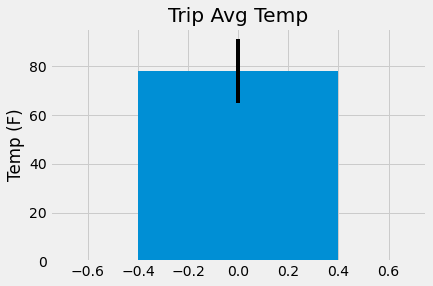

In [69]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x_pos = [0]
y_pos = [calcTemp["Average"]]
error = [(calcTemp["Max"] - calcTemp["Min"])]

plt.bar(x_pos,y_pos, yerr=error)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.xlim(-0.75,0.75)
plt.show()

In [30]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
startDate = "2015-08-23"
endDate = "2015-08-30"

sel = [s.station,s.name,s.latitude,s.longitude,s.elevation,func.sum(m.prcp)]
queryresult = session.query(*sel).\
    filter(s.station == m.station).\
    group_by(m.station).\
    filter(m.date >= startDate).\
    filter(m.date <= endDate).\
    order_by(func.sum(m.prcp).desc()).\
    all()
  
stations = pd.DataFrame(queryresult, columns=['Station','Name','Latitude','Longitude','Elevation','PrcpSum'])
stations

,Station,Name,Latitude,Longitude,Elevation,PrcpSum
0,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,10.46
1,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,9.03
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,6.55
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,4.61
4,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,2.36
5,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,2.10
6,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,1.94
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,1.50


In [31]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(m.tobs), func.avg(m.tobs), func.max(m.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", m.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [87]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`


# Set the start and end date of the trip
startDate = "2015-08-23"
endDate = "2015-08-30"

dtObj = dt.datetime.strptime(startDate,"%Y-%m-%d")
endObj = dt.datetime.strptime(endDate,"%Y-%m-%d")
# Use the start and end date to create a range of dates
# Loop through the list of %m-%d strings and calculate the normals for each date
# Stip off the year and save a list of %m-%d strings
trip_dates = []  
normals = []
while dtObj <= endObj: 
    datestr = dt.datetime.strftime(dtObj,"%m-%d")
    trip_dates.append(datestr)
    daily_normal = daily_normals(datestr)
    
    normals.append(list(np.ravel(daily_normal)))
    dtObj = dtObj + dt.timedelta(days = 1)
print(normals)


[[67.0, 76.6923076923077, 87.0], [70.0, 75.96153846153847, 84.0], [69.0, 76.96078431372548, 82.0], [71.0, 76.56862745098039, 84.0], [68.0, 76.28301886792453, 84.0], [67.0, 76.73469387755102, 86.0], [70.0, 76.23529411764706, 85.0], [68.0, 76.41666666666667, 84.0]]


In [94]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
dTrip = pd.DataFrame(normals,columns=["tmin","tavg","tmax"])
dTrip["date"]=trip_dates
dTrip = dTrip.set_index("date")
dTrip

,tmin,tavg,tmax
date,,,
08-23,67.0,76.692308,87.0
08-24,70.0,75.961538,84.0
08-25,69.0,76.960784,82.0
08-26,71.0,76.568627,84.0
08-27,68.0,76.283019,84.0
08-28,67.0,76.734694,86.0
08-29,70.0,76.235294,85.0
08-30,68.0,76.416667,84.0


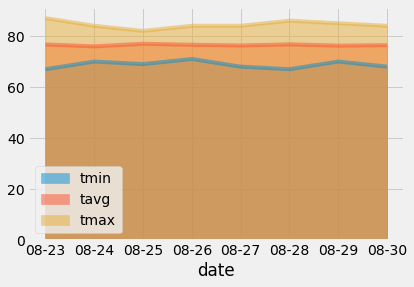

In [98]:
# Plot the daily normals as an area plot with `stacked=False`
dTrip.plot.area(stacked=False)